# ANN/MLP จำแนกผลไม้ 2 Class
Artificial Neural Network ด้วย MLP Scikit-learn จำแนก 2 Class (Binary Classification)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset

In [2]:
df = pd.read_csv('data/fruit2class.csv')

df.sample(7)
df.sample(6,random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,0
4,6.9,5.9,0


In [3]:
df.isnull().sum()   # Missing values

m         0
d         0
target    0
dtype: int64

In [4]:
df.target.unique()    # Class 

array([0, 1], dtype=int64)

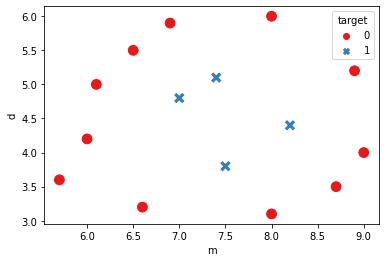

In [5]:
# sns.scatterplot(x='m', y='d', data=df, hue='target', style='target',s=140) 
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target',s=140, palette='Set1') 
plt.show()

In [6]:
# เตรียม X (Features) และ y target(class)
X = df.drop('target', axis=1)
y = df.target

## Feature Scaling
ปรับค่าสเกล Feature

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X)

y_train = y

In [8]:
df_sc = pd.DataFrame(X_train, columns=['d','m'])
df_sc['target'] = y_train
df_sc.head(8)
df_sc.sample(6,random_state=1)

,d,m,target
3,-0.736514,-1.398477,0
7,-0.352246,0.340562,1
6,0.800559,-0.094198,1
2,-0.832581,1.101391,0
10,1.473028,0.775322,0
4,-0.448313,1.536151,0


In [9]:
# df.sample(6,random_state=1)

## Model

In [10]:
from sklearn.neural_network import MLPClassifier

#### case 1: hidden=100, iteration=200 (default)

In [18]:
hidden = 100
# model = MLPClassifier(random_state=1)    # default hidden_layer_sizes=100
model = MLPClassifier(random_state=1, verbose=True) 

#### case 2: hidden=100, iter=2000

In [30]:
iter = 2000
hidden = 100
model = MLPClassifier(max_iter=iter, random_state=1)  # hidden=100

#### case 3: hidden=150, iter=200

In [ ]:
hidden = 150
iter = 200
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1) # **

#### case 4: hidden=4, iter=1000

In [ ]:
hidden = 4
iter = 1000    # or 2000
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

#### case 5: hidden=10, iter=2000

In [ ]:
hidden = 10
iter = 2000    # or 2500
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

## Train the Model

In [31]:
model.fit(X_train, y_train)

MLPClassifier(max_iter=2000, random_state=1)

In [32]:
print('score: {:.4f}'.format(model.score(X_train, y_train)))
# print('score:', model.score(X_train, y_train).round(4)) 
print('actual y: ', np.array(y))
print('predicted:', model.predict(X_train)) 

score: 1.0000
actual y:  [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]
predicted: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0]


## Evaluation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)
class_names = ['Grape', 'Lemon']

print('Score -> {:.4f}' . format(model.score(X_train, y_train)))
print(classification_report(y_train, y_predict, target_names=class_names))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00        11
       Lemon       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[11  0]
 [ 0  4]]


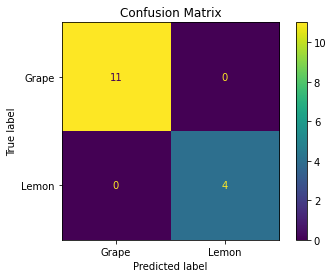

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Decision Regions

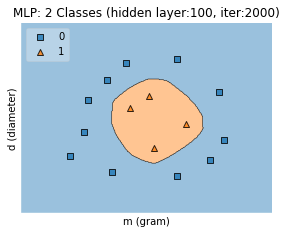

In [35]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2) 

plt.title('MLP: 2 Classes (hidden layer:{}, iter:{})'.format(hidden,iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.show()

In [36]:
[coef.shape for coef in model.coefs_]

[(2, 100), (100, 1)]

In [37]:
model = MLPClassifier(hidden_layer_sizes=(100,20), max_iter=iter, random_state=1)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 20), max_iter=2000, random_state=1)

## Loss Curve

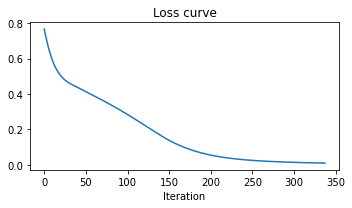

In [38]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()

In [ ]:
## try other cases

# ANN/MLP จำแนกผลไม้ 3 Class
Artificial Neural Network ด้วย MLP Scikit-learn จำแนก 3 Class 

In [39]:
df = pd.read_csv('data/fruit3class.csv')

# df.sample(7)
df.sample(6,random_state=1)

,m,d,target
3,6.6,3.2,0
7,7.0,4.8,1
6,8.2,4.4,1
2,6.5,5.5,0
10,8.9,5.2,2
4,6.9,5.9,0


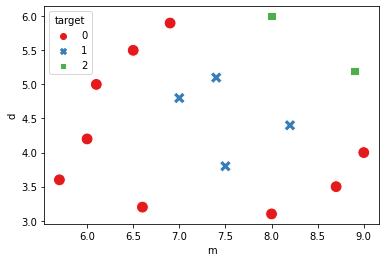

In [40]:
sns.scatterplot(x='m', y='d', data=df, hue='target', style='target',s=140, palette='Set1') 
plt.show()

In [41]:
df.isnull().sum()   # มี Missing values หรือไม่

m         0
d         0
target    0
dtype: int64

In [42]:
df.target.unique()   # target,class

array([0, 1, 2], dtype=int64)

In [43]:
X = df.drop('target', axis=1)
y = df.target

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X)

y_train = y

In [45]:
from sklearn.neural_network import MLPClassifier

#### case1: hidden=100, iteration=200

In [46]:
hidden = 100
iter = 200
model = MLPClassifier(random_state=1) 

#### case2: hidden=4, iter=2500

In [59]:
hidden = 4
iter = 2500
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

#### case 3: hidden=30, iter=2500

In [ ]:
hidden = 30
iter = 2500
model = MLPClassifier(hidden_layer_sizes=(hidden), max_iter=iter, random_state=1)

#### case4: 2 hidden layers (100 x 30)

In [ ]:
hidden = 100
hidden2 = 30

iter = 2500
model = MLPClassifier(hidden_layer_sizes=(hidden, hidden2), max_iter=iter, random_state=1)
# model = MLPClassifier(hidden_layer_sizes=(100, 30), max_iter=iter, random_state=1)

## Train the Model

In [60]:
model.fit(X_train, y_train)

print('score: {:.4f}'.format(model.score(X_train, y_train)))
print('score:', model.score(X_train, y_train).round(4)) 
print('actual y: ', np.array(y))
print('predicted:', model.predict(X_train)) 

score: 1.0000
score: 1.0
actual y:  [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]
predicted: [0 0 0 0 0 0 1 1 1 1 2 2 0 0 0]


## Evaluation

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(X_train)
class_names = ['Grape', 'Lemon', 'Orange']  ## <-----

print('Score -> {:.4f}' . format(model.score(X_train, y_train)))
print(classification_report(y_train, y_predict, target_names=class_names))
print(confusion_matrix(y_train, y_predict))

Score -> 1.0000
              precision    recall  f1-score   support

       Grape       1.00      1.00      1.00         9
       Lemon       1.00      1.00      1.00         4
      Orange       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

[[9 0 0]
 [0 4 0]
 [0 0 2]]


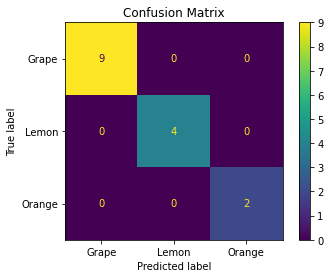

In [62]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_predict)
ConfusionMatrixDisplay(cm, display_labels=class_names).plot()
plt.title('Confusion Matrix')
plt.show()

## Decision Regions

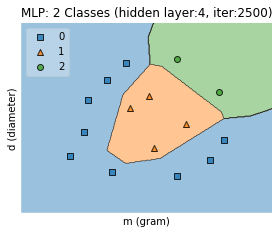

In [63]:
# the same as above
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model, legend=2) 

plt.title('MLP: 2 Classes (hidden layer:{}, iter:{})'.format(hidden,iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')
plt.show()

## Model info

In [64]:
[coef.shape for coef in model.coefs_]

[(2, 4), (4, 3)]

In [52]:
Image(filename='images/ch08 MLP scikit/fruit3c stru 20210523.png')

NameError: name 'Image' is not defined

In [53]:
# 100x30   Shallow Learning Network
Image(filename='images/ch08 MLP scikit/DL 20220428 194649.png')

NameError: name 'Image' is not defined

## Predict

In [65]:
# X_new = [[8.4, 5]]
X_new = [[8.4, 5.2], 
         [6.8 , 4.2]]
X_new

[[8.4, 5.2], [6.8, 4.2]]

In [66]:
X_new_sc = sc.transform(X_new)
X_new_sc

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.99269274,  0.77532161],
       [-0.54437989, -0.31157784]])

In [67]:
print('Prediction:', model.predict(X_new_sc))

Prediction: [2 1]


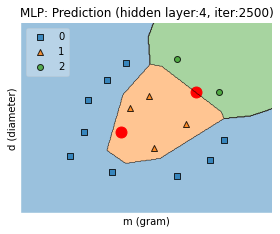

In [68]:
plt.figure(figsize=(4.5, 3.5))
plot_decision_regions(X_train, np.array(y_train), clf=model,
                      legend=2)

# plt.title('MLP: Prediction') 
plt.title('MLP: Prediction (hidden layer:{}, iter:{})'.format(hidden,iter))
plt.xticks([])
plt.yticks([])
plt.xlabel('m (gram)')
plt.ylabel('d (diameter)')

plt.scatter(X_new_sc[:,0], X_new_sc[:,1], marker='o', s=120, c='r')
plt.show()

## Loss Curve

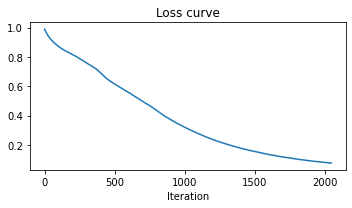

In [69]:
plt.figure(figsize=(5,3))
plt.title('Loss curve')
plt.xlabel('Iteration')
plt.plot(model.loss_curve_)
plt.tight_layout()
plt.show()